Problem 1 - Data Read, Write and Inspect:
Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [7]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/concept and Technologies of AI/bank (1).csv")
df.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Info
df.info()

# (a) Object type ko column haru
object_cols = df.select_dtypes(include='object')
print("Object dtype columns:\n", object_cols.columns)

# (b) Unique values of object columns
for col in object_cols.columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# (c) Null values in each column
print("\nNull values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Object dtype columns:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact

3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [9]:
# Drop object columns
df_numeric = df.drop(columns=object_cols.columns)

# Save new file
df_numeric.to_csv("banknumericdata.csv", index=False)
df_numeric.head()


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [10]:
df2 = pd.read_csv("banknumericdata.csv")
df2.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [11]:
df = pd.read_csv("/content/drive/MyDrive/concept and Technologies of AI/medical_students_dataset.csv")
df.head()


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [12]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [13]:
# Numerical example
df['Age'] = df['Age'].fillna(df['Age'].median())

# Categorical example
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [14]:
print("Total duplicates:", df.duplicated().sum())

df = df.drop_duplicates()


Total duplicates: 8611


Titanic Dataset Exercises

In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/concept and Technologies of AI/Titanic-Dataset.csv")


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

Creating subset

In [18]:
subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
subset = subset[subset['Pclass'] == 1]


Find mean, median, max, min of Fare

In [19]:
fare_mean = subset['Fare'].mean()
fare_median = subset['Fare'].median()
fare_max = subset['Fare'].max()
fare_min = subset['Fare'].min()

fare_mean, fare_median, fare_max, fare_min


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [20]:
subset['Age'].isnull().sum()

# Drop rows with missing Age
subset = subset.dropna(subset=['Age'])
subset.shape


(186, 6)

Problem-3

In [21]:
# One-hot encoding
encoded = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add to original df
df = pd.concat([df, encoded], axis=1)

# Drop original column
df.drop(columns=['Embarked'], inplace=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem-4

In [22]:
df.groupby('Sex')['Survived'].mean()


,Survived
Sex,
female,0.742038
male,0.188908


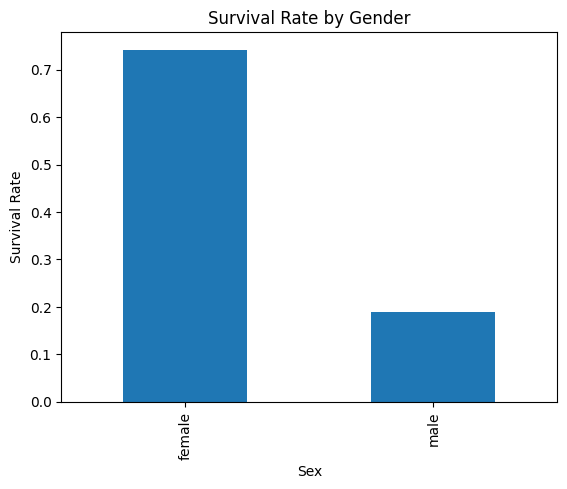

In [23]:
import matplotlib.pyplot as plt

df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()


Problem-5

['S' 'C' 'Q' nan]


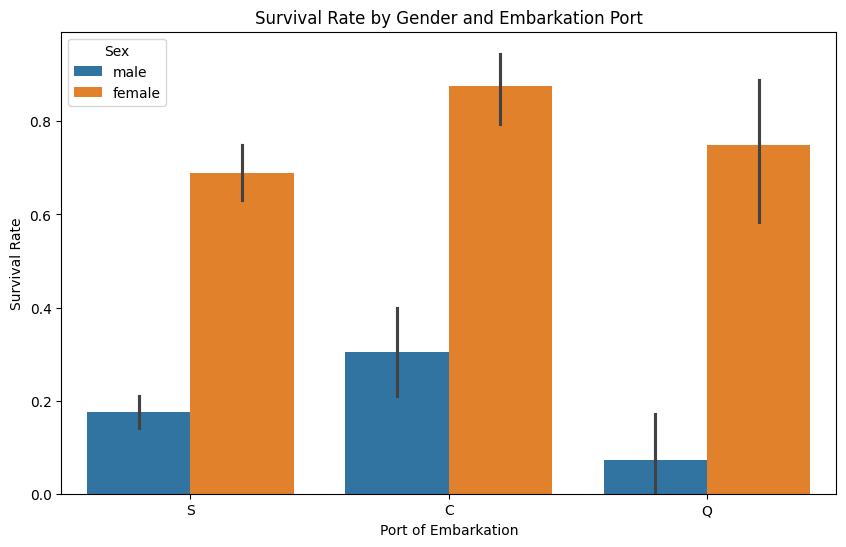

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/concept and Technologies of AI/Titanic-Dataset.csv")

# Check unique values in 'Embarked' to make sure columns exist
print(df['Embarked'].unique())

# Optional: Filter only the main ports ('C', 'Q', 'S')
df_filtered = df[df['Embarked'].isin(['C', 'Q', 'S'])]

# Visualization: Survival rate by gender for each embarkation port
plt.figure(figsize=(10,6))
sns.barplot(data=df_filtered, x='Embarked', y='Survived', hue='Sex')
plt.title("Survival Rate by Gender and Embarkation Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Survival Rate")
plt.show()




Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

Creating age groups

In [29]:
df['AgeGroup'] = pd.qcut(df['Age'], 5)


Group comparison

In [30]:
df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


/tmp/ipython-input-1245683636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64

Visualization

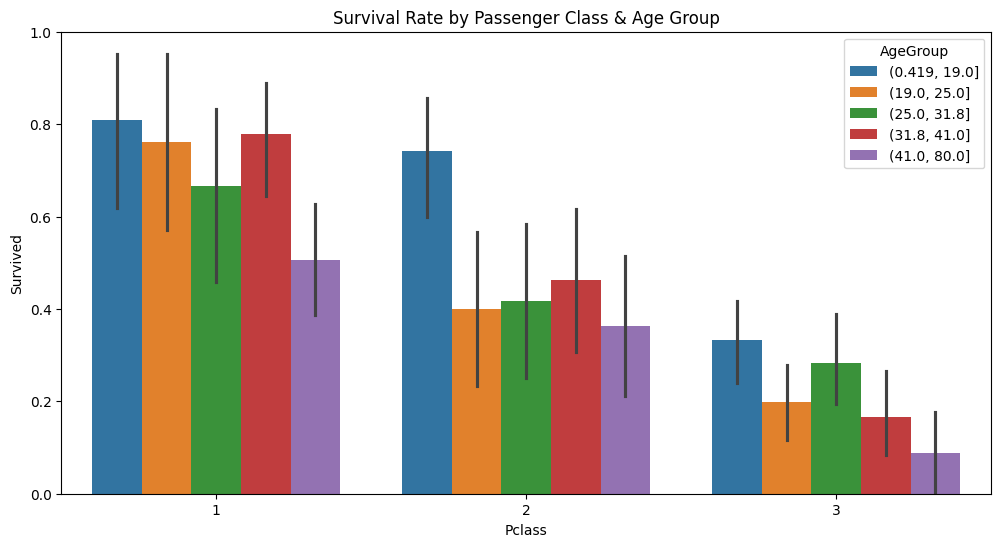

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Pclass', y='Survived', hue='AgeGroup')
plt.title("Survival Rate by Passenger Class & Age Group")
plt.show()
